### Read the file names

In [20]:
with open('merra_files.txt') as f:
    file_names = [line.rstrip() for line in f]

### Now loop through each file and save it

In [73]:
def download_data(url, filename, file_save_name):
    '''Downloads MERRA2 data
    '''

    # Set the FILENAME string to the data file name, the LABEL keyword value, or any customized name. 
    #FILENAME = 'your_filename_string_goes_here'

    import requests
    import os
    
    result = requests.get(url)
    try:
        result.raise_for_status()
        f = open(filename,'wb')
        f.write(result.content)
        f.close()
        
        os.rename(filename, file_save_name)
        print('contents of URL written to '+ file_save_name)
    except:
        print('requests.get() returned an error code '+str(result.status_code))

In [75]:
for file in file_names[1:]:
    #Ignore first file as its a README

    contents_split = file.rsplit('/', 1)
    url = contents_split[0]
    file_name = contents_split[1]#.split('?')[0]

    year = file_name.split('.')[2][:4]
    month = file_name.split('.')[2][4:]

    file_save_name = 'MERRA2_' + year + '_' + month + '.nc'
    
    print(file_name)
    #download_data(url, file_name, file_save_name)

MERRA2_100.instM_3d_asm_Np.198001.nc4.nc4?Cov_V_H,Cov_V_QV,Cov_V_T,PHIS,PS,QV,T,time,lev,lat,lon
MERRA2_100.instM_3d_asm_Np.198002.nc4.nc4?Cov_V_H,Cov_V_QV,Cov_V_T,PHIS,PS,QV,T,time,lev,lat,lon
MERRA2_100.instM_3d_asm_Np.198003.nc4.nc4?Cov_V_H,Cov_V_QV,Cov_V_T,PHIS,PS,QV,T,time,lev,lat,lon
MERRA2_100.instM_3d_asm_Np.198004.nc4.nc4?Cov_V_H,Cov_V_QV,Cov_V_T,PHIS,PS,QV,T,time,lev,lat,lon
MERRA2_100.instM_3d_asm_Np.198005.nc4.nc4?Cov_V_H,Cov_V_QV,Cov_V_T,PHIS,PS,QV,T,time,lev,lat,lon
MERRA2_100.instM_3d_asm_Np.198006.nc4.nc4?Cov_V_H,Cov_V_QV,Cov_V_T,PHIS,PS,QV,T,time,lev,lat,lon
MERRA2_100.instM_3d_asm_Np.198007.nc4.nc4?Cov_V_H,Cov_V_QV,Cov_V_T,PHIS,PS,QV,T,time,lev,lat,lon
MERRA2_100.instM_3d_asm_Np.198008.nc4.nc4?Cov_V_H,Cov_V_QV,Cov_V_T,PHIS,PS,QV,T,time,lev,lat,lon
MERRA2_100.instM_3d_asm_Np.198009.nc4.nc4?Cov_V_H,Cov_V_QV,Cov_V_T,PHIS,PS,QV,T,time,lev,lat,lon
MERRA2_100.instM_3d_asm_Np.198010.nc4.nc4?Cov_V_H,Cov_V_QV,Cov_V_T,PHIS,PS,QV,T,time,lev,lat,lon
MERRA2_100.instM_3d_asm_Np.198

In [48]:
contents_split = file.rsplit('/', 1)
url = contents_split[0]
file_name = contents_split[1]

year = file_name.split('.')[2][:4]
month = file_name.split('.')[2][4:]

file_save_name = 'MERRA2_' + year + '_' + month + '.nc'

In [50]:
file_name.split('?')

['MERRA2_100.instM_3d_asm_Np.198208.nc4.nc4',
 'Cov_V_H,Cov_V_QV,Cov_V_T,PHIS,PS,QV,T,time,lev,lat,lon']

In [ ]:
MERRA2_100.instM_3d_asm_Np.198007.nc4

In [ ]:
https://goldsmr5.gesdisc.eosdis.nasa.gov/opendap/MERRA2_MONTHLY/M2IMNPASM.5.12.4/1980/
MERRA2_100.instM_3d_asm_Np.198001.nc4.nc4?Cov_V_H,Cov_V_QV,Cov_V_T,PHIS,PS,QV,T,time,lev,lat,lon

In [67]:
#url = 'https://goldsmr5.gesdisc.eosdis.nasa.gov/opendap/MERRA2_MONTHLY/M2IMNPASM.5.12.4/1980/'
#file_name = 'MERRA2_100.instM_3d_asm_Np.198001.nc4'#.nc4?Cov_V_H,Cov_V_QV,Cov_V_T,PHIS,PS,QV,T,time,lev,lat,lon'

url = 'https://acdisc.gesdisc.eosdis.nasa.gov/data//Aqua_AIRS_Level3/AIRX3STD.006/2006/AIRS.2006.12.31.L3.RetStd001.v6.0.9.0.G13155192744.hdf'
file_name = 'AIRS.2006.12.31.L3.RetStd001.v6.0.9.0.G13155192744.hdf'

file_save_name = 'test.nc'
test = download_data(url, file_name, file_save_name)

requests.get() returned an error code 401


In [86]:
import xarray as xr
import matplotlib.pyplot as plt

test = xr.open_dataset('raw_data/MERRA2_100.instM_3d_asm_Np.198001.nc4.nc4')

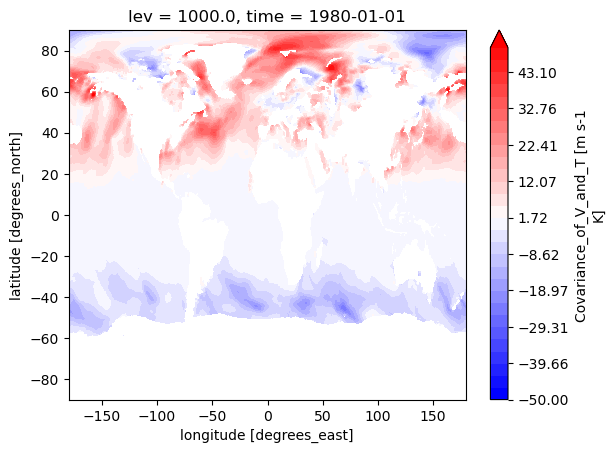

In [91]:
test.Cov_V_T.isel(lev=0, time=0).plot.contourf(vmin=-50, vmax=50, levels=30, cmap='bwr')

plt.show()